# Date Visualizations

Setup

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

In [7]:
def getPivot(dataframe, indexCol):
    dfPivot = dataframe.copy(); 
    if indexCol == "Date":
        dfPivot[indexCol] = pd.to_datetime(dfPivot[indexCol], format='%Y-%m');
    dfPivot.index = dfPivot[indexCol];
    del dfPivot[indexCol];
    return dfPivot;

In [8]:
# dateDataPath = "/content/drive/MyDrive/Coursework/Co-op Winter 2022/2021 SHS Statistics Analysis/Date data.xlsx";
dateDataPath = "3_analyzedData/Date data.xlsx";

Day

<AxesSubplot:title={'center':'Total Cases per Day in 2021'}, xlabel='Date', ylabel='Total Cases'>

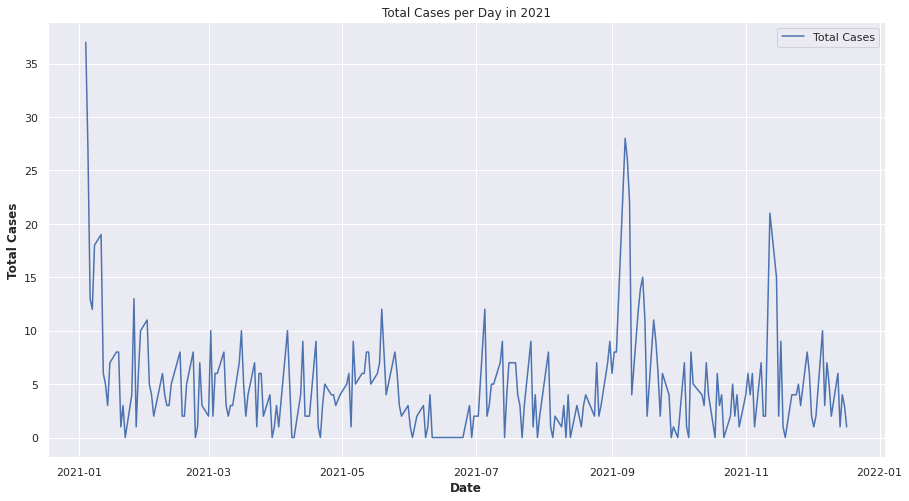

In [9]:
df_Day = pd.read_excel(dateDataPath, sheet_name="Day");

def getlineChart_Day(dataframe_Day):
  dfPivot = getPivot(dataframe_Day, "Date");
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.lineplot(data=dfPivot);
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel("Date", fontweight="bold");
    plt.title("Total Cases per Day in 2021");
  return chart;

lineChart_Day = getlineChart_Day(df_Day)
lineChart_Day

Year

In [10]:
df_Year = pd.read_excel(dateDataPath, sheet_name="Year");

def transposeDataframe_Day(dataframe_Year):
    data = [];
    for col in dataframe_Year.columns.tolist():
        row = [col];
        for i in dataframe_Year.index:
            row.append(str(dataframe_Year.loc[i, col]));
        data.append(row);
    dfTranspose = pd.DataFrame(data, columns=["","Descriptive Statistic"]);
    return dfTranspose;

dfTransposed_Year = transposeDataframe_Day(df_Year);
dfTransposed_Year

,,Descriptive Statistic
0,Year,2021
1,Total Cases,1162
2,Work Days,239
3,Work Days with no cases,32
4,Mean,4.86
5,Median,4
6,Mode,0
7,Minimum,0
8,Maximum,37
9,Range,37


Semester

<AxesSubplot:title={'center':'Total Cases per Semester in 2021'}, xlabel='Semester', ylabel='Total Cases'>

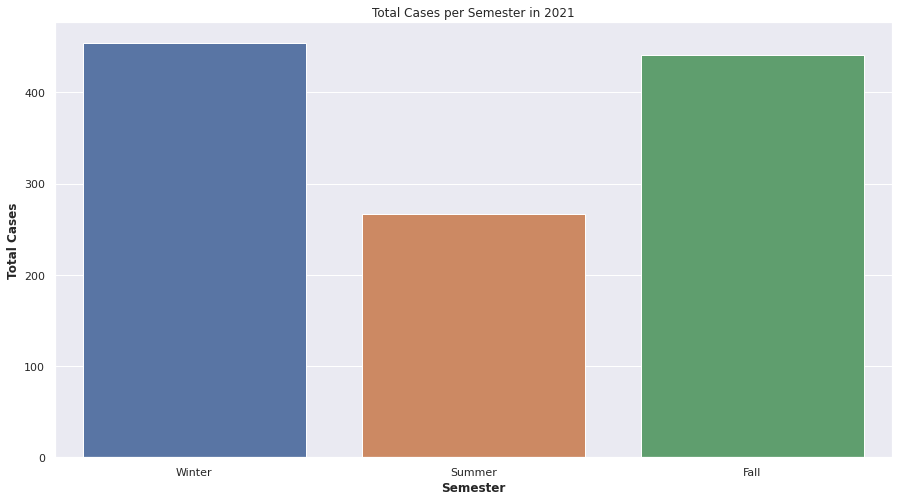

In [11]:
df_Semester = pd.read_excel(dateDataPath, sheet_name="Semester");

def getBarChart_Semester(dataframe_Semester):
  dfPivot = getPivot(dataframe_Semester, "Semester");
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.barplot(data=dfPivot, x=dfPivot.index, y="Total Cases");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel("Semester", fontweight="bold");
    plt.title("Total Cases per Semester in 2021");
  return chart;

barchart_Semester = getBarChart_Semester(df_Semester);
barchart_Semester

Month

<AxesSubplot:title={'center':'Total Cases per Month in 2021'}, xlabel='Month', ylabel='Total Cases'>

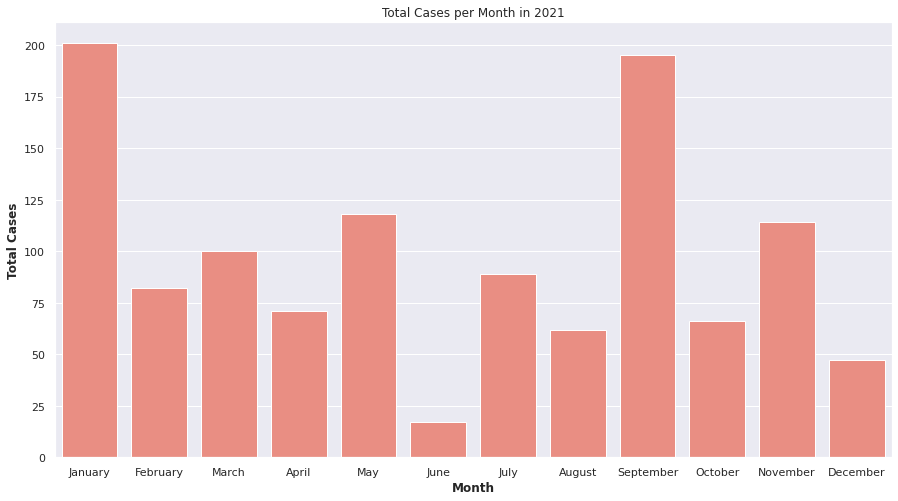

In [12]:
df_Month = pd.read_excel(dateDataPath, sheet_name="Month");

def getBarChart_Month(dataframe_Month):
  dfPivot = getPivot(dataframe_Month, "Month");
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.barplot(data=dfPivot, x=dfPivot.index, y="Total Cases", color="salmon");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel("Month", fontweight="bold");
    plt.title("Total Cases per Month in 2021");
    # plt.xticks(rotation=400);
  return chart;

barchart_Month = getBarChart_Month(df_Month);
barchart_Month

Day of Week

<AxesSubplot:title={'center':'Total Cases per Weekday in 2021'}, xlabel='Weekday', ylabel='Total Cases'>

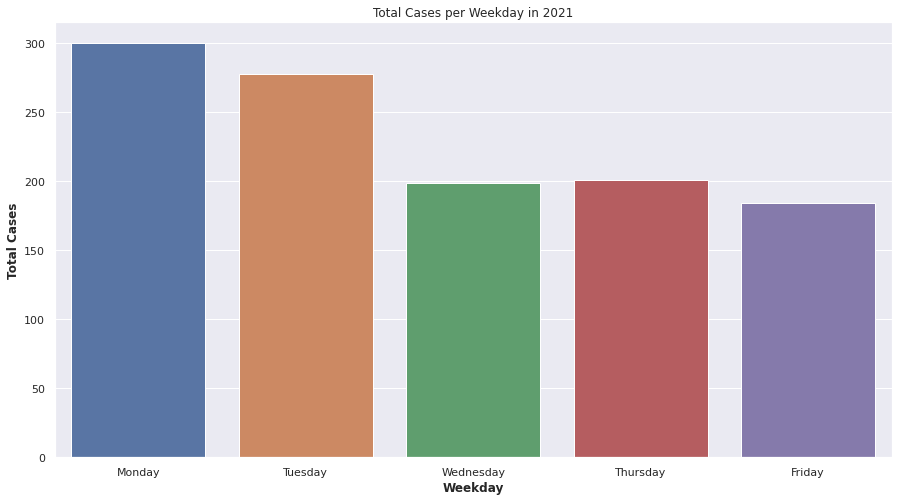

In [13]:
df_Weekday = pd.read_excel(dateDataPath, sheet_name="Weekday");

def getBarChart_Weekday(dataframe_Weekday):
    dfPivot = getPivot(dataframe_Weekday, "Weekday");
    with sns.axes_style("darkgrid"):
        sns.set(rc = {'figure.figsize':(15,8)});
        chart = sns.barplot(data=dfPivot, x=dfPivot.index, y="Total Cases");
        plt.ylabel("Total Cases", fontweight="bold");
        plt.xlabel("Weekday", fontweight="bold");
        plt.title("Total Cases per Weekday in 2021");
    return chart;

barchart_Weekday = getBarChart_Weekday(df_Weekday);
barchart_Weekday

Day of Week in Semester

<AxesSubplot:title={'center':'Total Cases per Weekday by Semester in 2021'}, xlabel='Weekday', ylabel='Total Cases'>

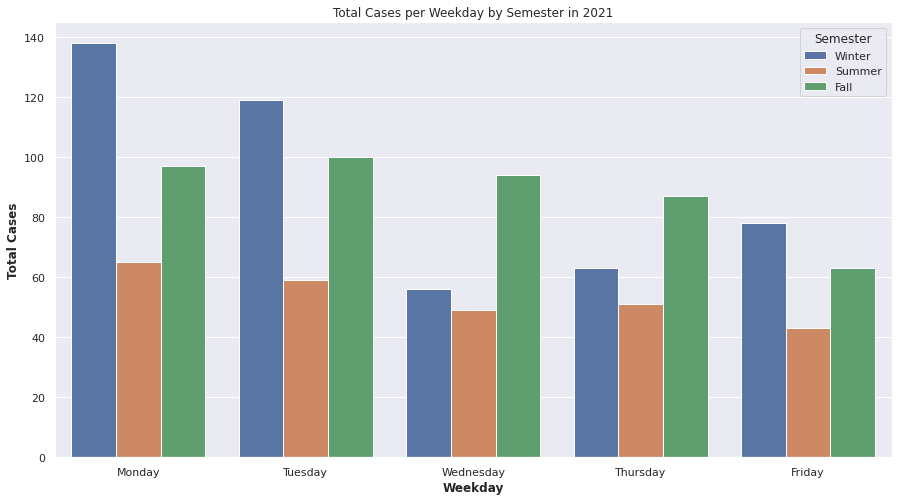

In [14]:
df_Weekday_Winter = pd.read_excel(dateDataPath, sheet_name="Weekday - Winter");
df_Weekday_Summer = pd.read_excel(dateDataPath, sheet_name="Weekday - Summer");
df_Weekday_Fall = pd.read_excel(dateDataPath, sheet_name="Weekday - Fall");

def getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall):
    df_Winter = dataframeWinter.copy();
    df_Summer = dataframeSummer.copy();
    df_Fall = dataframeFall.copy();

    df_Winter["Semester"] = "Winter";
    df_Summer["Semester"] = "Summer";
    df_Fall["Semester"] = "Fall"

    df = pd.concat([df_Winter,df_Summer,df_Fall]);
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    df = df[df.columns.tolist()[0:3]]
    return df;

df_Weekday_Semester = getTotalCasesPerWeekdayInSemester(df_Weekday_Winter,df_Weekday_Summer,df_Weekday_Fall);

def getBarChart_Weekday_Semester(dataframe_Weekday_Semester):
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    # chart = sns.catplot(data=dataframe_Weekday_Semester, x="Weekday", y="Total Cases", hue="Semester", kind="bar");
    chart = sns.barplot(data=dataframe_Weekday_Semester, x="Weekday", y="Total Cases", hue="Semester");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel("Weekday", fontweight="bold");
    plt.title("Total Cases per Weekday by Semester in 2021");
    # plt.xticks(rotation=45);
  return chart;

barChart_Weekday_Semester = getBarChart_Weekday_Semester(df_Weekday_Semester);
barChart_Weekday_Semester

Week

<AxesSubplot:title={'center':'Total Cases per Week in 2021'}, xlabel='Week', ylabel='Total Cases'>

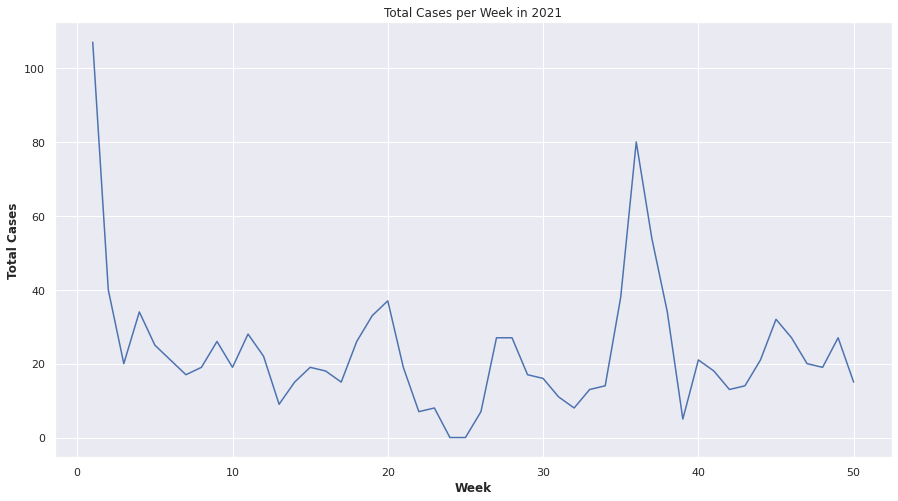

In [15]:
df_Week = pd.read_excel(dateDataPath, sheet_name="Week");

def getLineChart_Week(dataframe_Week):
  dfPivot = getPivot(dataframe_Week, "Week");
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.lineplot(data=dfPivot, x=dfPivot.index, y="Total Cases");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel("Week", fontweight="bold");
    plt.title("Total Cases per Week in 2021");
  return chart;

lineChart_Week = getLineChart_Week(df_Week);
lineChart_Week